 ** Rental Bike Sharing **

---
---


# Carga de datos

fuente:https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing

info:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


drive.mount('/content/drive')
%cd  "/content/drive/MyDrive/Coderhouse/2da entrega"


Mounted at /content/drive
/content/drive/MyDrive/Coderhouse/2da entrega


In [ ]:
df = pd.read_csv ("Bicicletas por hora.csv",sep = ",")

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Modificacion dataset

## Eliminacion Columnas

In [ ]:
del df["instant"]

## Agrego columna catcnt

In [ ]:
df["catcnt"] = ""
df.loc[df["cnt"] > 0, "catcnt"] = "Entre 1  y 50"
df.loc[df["cnt"] > 50, "catcnt"] = "Entre 51  y 100"
df.loc[df["cnt"] > 100, "catcnt"] = "Entre 100 y 150"
df.loc[df["cnt"] > 150, "catcnt"] = "Mayor a 150" 

 # probe varias veces de hacerlo con un if y no lo logre
 # es rudimentario pisar las categorias ya armadas pero funciona
 # buscar mejor solucion

In [ ]:
df.catcnt.value_counts()

Mayor a 150        8379
Entre 1  y 50      4876
Entre 51  y 100    2159
Entre 100 y 150    1965
Name: catcnt, dtype: int64

In [ ]:
df.catcnt.value_counts(normalize=True)*100

Mayor a 150        48.213361
Entre 1  y 50      28.056850
Entre 51  y 100    12.423039
Entre 100 y 150    11.306750
Name: catcnt, dtype: float64

In [ ]:
df["yr"].unique() # que valores de año hay.....0 es 2011 y 1 es 2012

array([0, 1])

## Agregar dia de la semana (en letras)

In [ ]:
df["dia_sem_letra"] = df["weekday"]

df.dia_sem_letra = df.dia_sem_letra.replace({0: "dom", 1: "lun",2:"mar",3:"mie",4:"jue",5:"vie",6:"sab"})

df.head()
df["dia_sem_letra"].unique() #para probar si tomo todos los dias

array(['sab', 'dom', 'lun', 'mar', 'mie', 'jue', 'vie'], dtype=object)

In [ ]:
df.head(20)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Entre 1 y 50,sab
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Entre 1 y 50,sab
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Entre 1 y 50,sab
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Entre 1 y 50,sab
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Entre 1 y 50,sab
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,Entre 1 y 50,sab
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,Entre 1 y 50,sab
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,Entre 1 y 50,sab
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,Entre 1 y 50,sab
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,Entre 1 y 50,sab


# Graficos

## Matplotlib

### Cantidad de alquileres segun el día de la semana 



Los alquileres por dia son relativamente constantes. Descarto el grafico por falta de información relevante

Text(0.5, 0, 'Día de la semana')

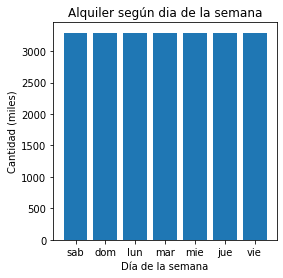

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(df["dia_sem_letra"],df["cnt"].sum()/1000)
ax.set_title("Alquiler según dia de la semana")
ax.set_ylabel ("Cantidad (miles)")
ax.set_xlabel ("Día de la semana")



In [ ]:
df.groupby("dia_sem_letra")[["cnt"]].sum() #comprobacion de los valores del grafico anterior

,cnt
dia_sem_letra,
dom,444027
jue,485395
lun,455503
mar,469109
mie,473048
sab,477807
vie,487790


### Sensación termica / temperatura vs cantidad alquilada


a mas temperatura / sensación termica, en principio se nota un ascenso en las cantidades alquiladas, pero en ambos casos hay picos hacia arriba y hacia abajo.
Luego la curva decrece

Text(0, 0.5, 'Cantidad')

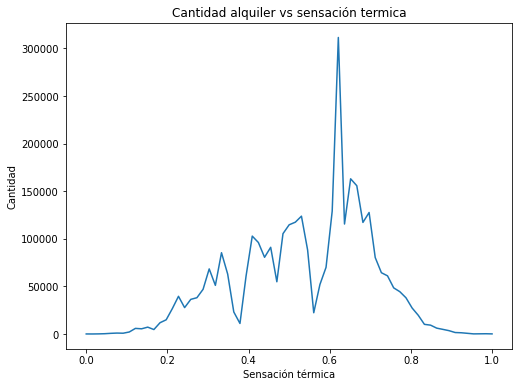

In [ ]:
datos= df.groupby("atemp")[["cnt"]].sum()
fig, ax = plt.subplots(figsize = (8,6))
ax.plot (datos.index,datos["cnt"])
ax.set_title("Cantidad alquiler vs sensación termica")
ax.set_xlabel("Sensación térmica")
ax.set_ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

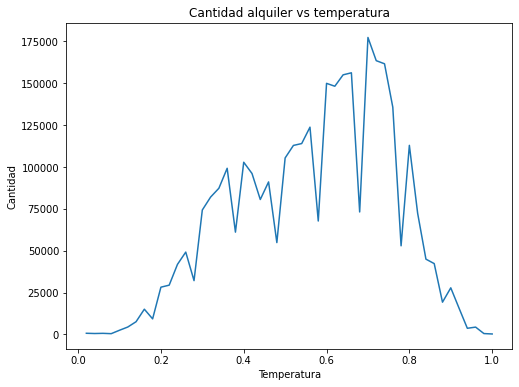

In [ ]:
# Igual pero con temperatura
datos= df.groupby("temp")[["cnt"]].sum()
fig, ax = plt.subplots(figsize = (8,6))
ax.plot (datos.index,datos["cnt"])
ax.set_title("Cantidad alquiler vs temperatura")
ax.set_xlabel("Temperatura")
ax.set_ylabel("Cantidad")

### Viento vs Cantidad

a mas viento menos alquiler. Hay un comportamiento raro en los primeros valores del viento

Text(0.5, 0, 'Viento')

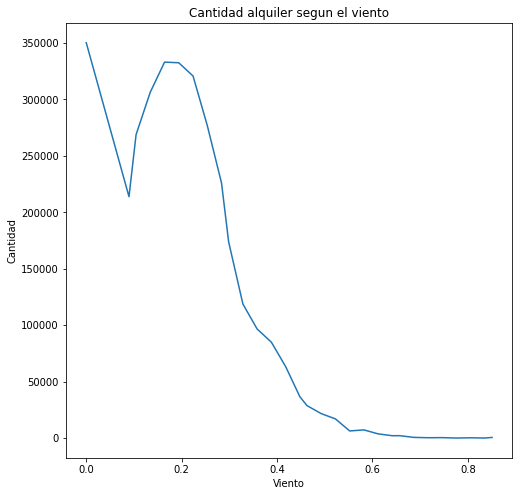

In [ ]:
datos= df.groupby("windspeed")[["cnt"]].sum()
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(datos.index,datos["cnt"])
ax.set_title ("Cantidad alquiler segun el viento")
ax.set_ylabel("Cantidad")
ax.set_xlabel ("Viento")

### Distribución catcnt

evaluar redstribuir las categorias

cuando habia hecho la comprobacion en tabla me daba que mayor a 150
era aprox un 48%. En la grafica se ve distinto...por que?

rta: el 48% eran la cantidad de apariciones (registros), pero cuando sumas los valores
de las bicicletas alquiladas el efecto es diferente



<ipython-input-16-2849165ccff1>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.pie(datos,labels = datos.index)


Text(0.5, 1.0, 'Dsitribución catcnt')

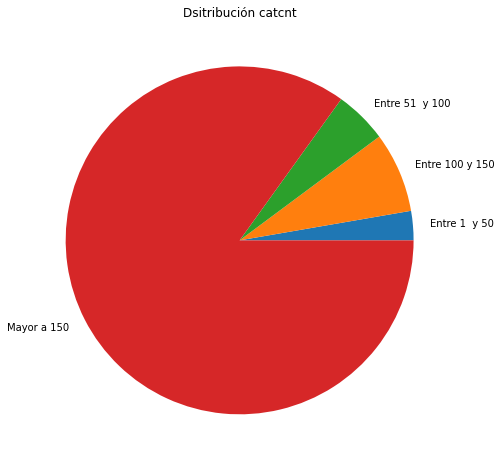

In [ ]:
datos = df.groupby("catcnt")[["cnt"]].sum()
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(datos,labels = datos.index)
ax.set_title ("Dsitribución catcnt")



In [ ]:
datos #tabla grafico anterior


,cnt
catcnt,
Entre 1 y 50,89539
Entre 100 y 150,245411
Entre 51 y 100,161375
Mayor a 150,2796354


### Comportamiento alquiler por hora

se distinguen horas picos en los alquileres y pocos outliers

<function matplotlib.pyplot.show(*args, **kw)>

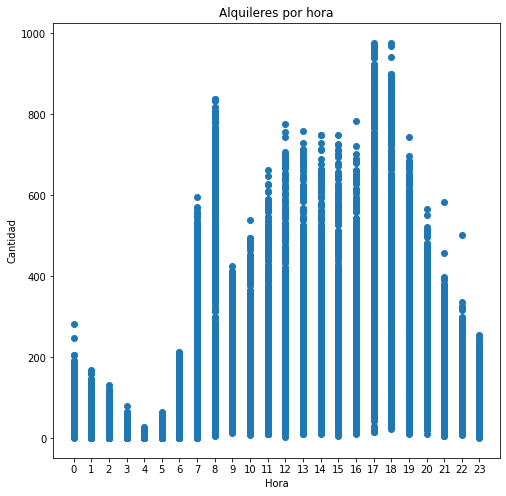

In [ ]:
from matplotlib.ticker import MultipleLocator
fig,ax = plt.subplots(figsize = (8,8))
ax.scatter(df["hr"],df["cnt"])
ax.set_title("Alquileres por hora")
ax.set_xlabel ("Hora")
ax.set_ylabel ("Cantidad")
#plt.xticks(rotation=45)
#ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xticks(range(0,24,1))
plt.show

## Seaborn

### Comportamiento segun el dia (horas vs cantidad)
siguiendo la idea del grafico anterior, se evalua por dia.

se observan comportamientos parecidos:

*   sabados y domingos
*   luns a viernes



<function matplotlib.pyplot.show(*args, **kw)>

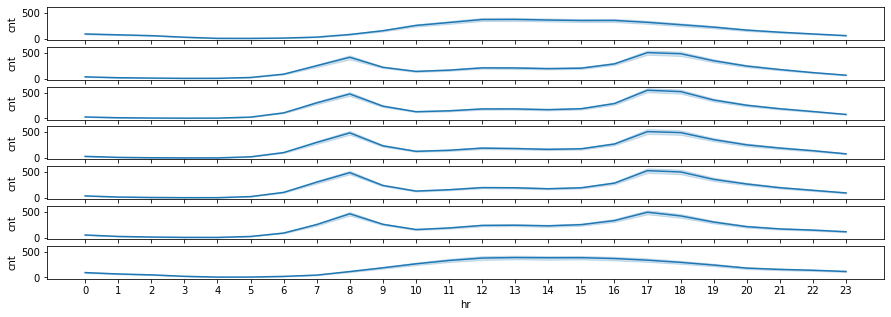

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(15, 5), sharey=True,sharex=True)
sns.lineplot(ax= axes[0], data = df[df["weekday"]==0], y="cnt",x="hr")
sns.lineplot(ax= axes[1], data = df[df["weekday"]==1], y="cnt",x="hr")
sns.lineplot(ax= axes[2], data = df[df["weekday"]==2], y="cnt",x="hr")
sns.lineplot(ax= axes[3], data = df[df["weekday"]==3], y="cnt",x="hr")
sns.lineplot(ax= axes[4], data = df[df["weekday"]==4], y="cnt",x="hr")
sns.lineplot(ax= axes[5], data = df[df["weekday"]==5], y="cnt",x="hr")
sns.lineplot(ax= axes[6], data = df[df["weekday"]==6], y="cnt",x="hr")

#ax[0].grid(axis='both')
#ax[1].grid(axis='both')

plt.xticks(range(0,24,1))
plt.show

### Dias de semana vs fin de semana (horas vs cantidad)

en la semana los picos se dan a las 8 y las 17 (supongo entrada/salida trabajo)

en el fin de semana hay un consumo mas achatado con valores maximos entre las 12 y las 16

In [ ]:

lun_a_sab = df[df["weekday"] >0]
lun_a_vie = lun_a_sab[lun_a_sab["weekday"]<6]  # no encontre la forma de filtrar en un solo paso
dom = df[df["dia_sem_letra"] =="dom"]
sab= df[df["dia_sem_letra"] =="sab"]
sab_y_dom = pd.concat([dom,sab])



<function matplotlib.pyplot.show(*args, **kw)>

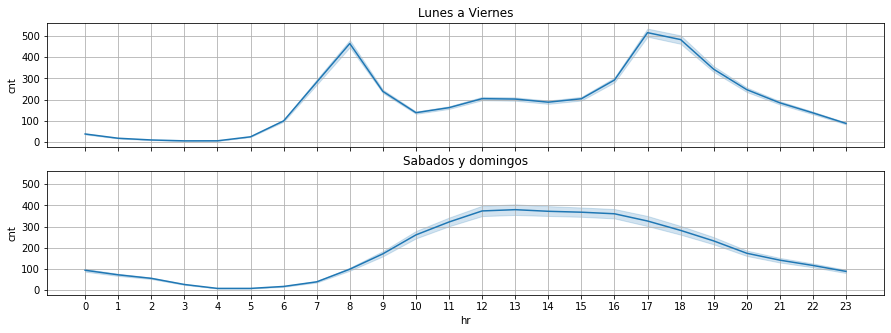

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharey=True,sharex=True)
sns.lineplot(ax= axes[0], data = lun_a_vie, y="cnt",x="hr")
sns.lineplot(ax= axes[1], data = sab_y_dom, y="cnt",x="hr")

axes[0].grid(axis='both')
axes[1].grid(axis='both')
axes[0].set_title("Lunes a Viernes")
axes[1].set_title("Sabados y domingos")



plt.xticks(range(0,24,1))
plt.show

### Temperatura  / sensacion termica vs weathersit	(categorias de clima)

Categorias clima: 1= bueno a 4 = malo responden a la temperatura y sencion termica. El clima bueno tiene mayor temperatura y sensación termica.

Los valores parecen tener una correcta distribución


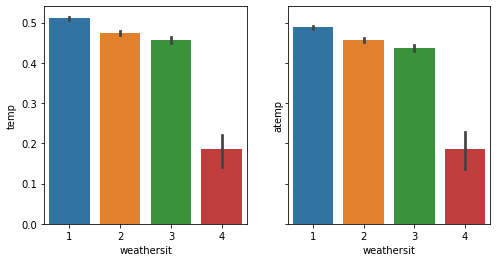

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True,sharex=True)
sns.barplot(ax =axes[0] , x="weathersit",y="temp",data=df)
sns.barplot(ax =axes[1] , x="weathersit",y="atemp",data=df)

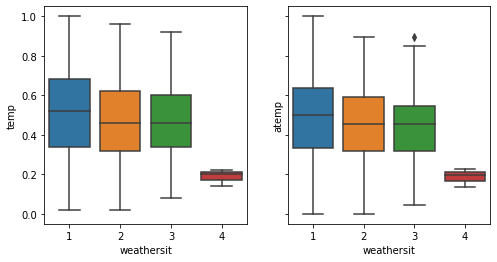

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True,sharex=True)
sns.boxplot(x="weathersit",y="temp",data=df,ax = axes[0])
sns.boxplot(x="weathersit",y="atemp",data=df,ax = axes[1])

### Catcnt (cantidad alquilada por clase) vs weathersit

con weathersit 3 y 4 no alquilan?

consultar con javier 

da la impresion que el grafico no es adecuado

con histplot se la mayor densidad con weathersit = 1 y catcnt = "mayor a 150" (pero eso es producto a mi categorizacion) y se ve como no hay datos en weathersit = 4, tanto para "entre 51 y 100" y "101 a 150"


los 164 alquileres del w == 4 y catcnt = "mayor a 150" deben responder a otra variable

([<matplotlib.axis.XTick at 0x7fcfd6f701f0>,
 <a list of 5 Text major ticklabel objects>)

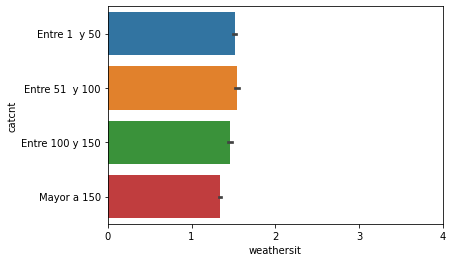

In [ ]:
sns.barplot(data=df,x="weathersit",y="catcnt")
plt.xticks(range(0,5,1))

In [ ]:
df.groupby("weathersit")["cnt"].sum() #hay valores de alquiler, pero ¿como afecta en las categorias?

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

In [ ]:
df.groupby(['weathersit','catcnt'])["cnt"].sum()

weathersit  catcnt         
1           Entre 1  y 50        54558
            Entre 100 y 150     154842
            Entre 51  y 100      94294
            Mayor a 150        2034479
2           Entre 1  y 50        22802
            Entre 100 y 150      70144
            Entre 51  y 100      47587
            Mayor a 150         655419
3           Entre 1  y 50        12120
            Entre 100 y 150      20425
            Entre 51  y 100      19494
            Mayor a 150         106292
4           Entre 1  y 50           59
            Mayor a 150            164
Name: cnt, dtype: int64

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

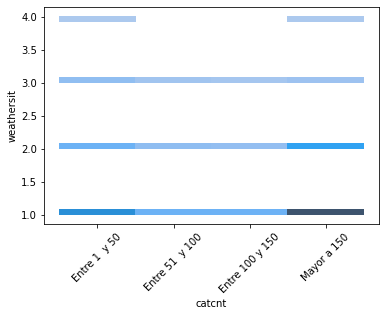

In [ ]:
sns.histplot(data=df,x="catcnt",y="weathersit")
plt.xticks(rotation=45)